<a href="https://colab.research.google.com/github/ksydata/PseudonymData_Processing/blob/main/PsuedonymPreprocessing_SY_231013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [269]:
#  데이터 처리 모듈
import pandas as pd
from sklearn.impute import KNNImputer
# !pip install miceforest
# import miceforest as mf

# 행렬 등 통계 연산 모듈
import numpy as np
# 지수형 표기법 e를 연속형 변환
pd.options.display.float_format = '{:.4f}'.format
# 타입 어노테이션(Any, Sequence 등의 메서드 활용)
from typing import *
import os

# 구글 드라이브 마운트
from google.colab import drive
drive.mount("/content/drive")
import os

# 조합 찾는 반복문 메서드
from itertools import permutations
from itertools import combinations

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.데이터베이스.테이블 전처리 및 로드(with PYTHON)

In [270]:
# 텍스트 파일 n개가 포함된 C(로컬디스크) 내 파일경로 설정
file_path = "/content/drive/MyDrive" + "/" + "2023 가명익명처리 해커톤"

# 파일경로 내 텍스트 파일명을 디렉토리 리스트에 저장
field_directory = os.listdir(file_path)
field_dataname: List = [
    ((field_directory[index].split(".csv"))[0]).split("_csv")[0]
    for index in range(len(field_directory))]

field_directory.pop(0)
field_directory.pop(3)
field_directory.pop(3)
field_directory.pop(3)
field_directory.pop(3)
field_directory.pop(3)
display(field_directory)

# field_dataname.pop(0)
# display(field_dataname)

['대출정보(CREDB_P1_LN).csv',
 '연체정보(CREDB_P1_DLQ).csv',
 '카드개설정보(CREDB_P1_CD_OPN).csv',
 'CREDIT_DATA_MICE.csv']

In [271]:
CREDIT_DATA_LIST = []
for FILE_NAME in field_directory:
  CREDIT_DATA = pd.read_csv(os.path.join(file_path + "/" + FILE_NAME), index_col = False, encoding = "utf-8")
  CREDIT_DATA_LIST.append(CREDIT_DATA)

In [272]:
CREDIT_DATA_LIST[3]
# [0] JOIN_KEY
# [1] JOIN_KEY
# [2] JOIN_KEY
# [3] JOIN_KEY

,JOIN_KEY,name,birth,city,gender,join_dt,mail,login_ip,주소
0,X0010254691714933659,갑연호,1995-06-09,제주,남,2018-12-04,ngladbeck5d@naver.com,200.54.167.193,은평구응암동 593-18
1,X0013455316779233219,갑정민,1991-02-11,안동,남,2020-01-27,dyurkevichis@nate.com,150.145.64.126,중구필동1가 41-1대
2,X0019385710745765957,갑지영,1953-02-27,아산,남,2017-04-25,ahoggani5@nate.com,51.14.60.12,용산구후암동 43-57대
3,X0019442830801994941,갑지용,1950-05-02,대구,남,2017-12-01,bryles60@naver.com,17.134.169.92,성동구금호동3가1265-69
4,X0032015350750301834,경규원,1984-05-16,군포,여,2018-01-29,fcroxleyqg@empas.com,113.49.78.164,중구남대문로5가 541대
...,...,...,...,...,...,...,...,...,...
1995,Y9181513434793472471,황세현,1977-08-19,신탄진,여,2018-09-15,xlanahanjp@abc.kr,73.74.179.243,구로구구로동 726-1대
1996,Y9182798377373211876,기선율,1993-09-07,아산,남,2018-08-30,ibowes8a@naver.com,112.255.124.144,관악구신림동1481-18
1997,Y9212450030016052600,박수연,1952-05-25,양양,여,2017-04-19,nlambisk2@abc.kr,21.180.233.51,종로구와룡동 75-4
1998,Y9218641984009740630,이지안,1979-10-10,아산,여,2019-04-12,ygreigqx@lycos.com,73.74.179.243,성동구응봉동10-115


In [273]:
print(len(CREDIT_DATA_LIST[0]), len(CREDIT_DATA_LIST[1]), len(CREDIT_DATA_LIST[2]), len(CREDIT_DATA_LIST[3]))

100 10785 100 2000


In [274]:
# CREDIT_DATA_JOIN_KEY = pd.merge(CREDIT_DATA_LIST[0], CREDIT_DATA_LIST[1], on = "JOIN_KEY", how = "right")
# CREDIT_DATA_JOIN_KEY = pd.merge(CREDIT_DATA_LIST[2], CREDIT_DATA_JOIN_KEY, on = "JOIN_KEY", how = "right")
# CREDIT_DATA_JOIN_KEY = pd.merge(CREDIT_DATA_LIST[3], CREDIT_DATA_JOIN_KEY, on = "JOIN_KEY", how = "right")
# CREDIT_DATA_JOIN_KEY["JOIN_KEY"]
# MEMBER_INFO = pd.read_csv(os.path.join(file_path + "/" + "MEMBER_INFO_TEXT.csv"), index_col = 0, encoding = "utf-8")

In [113]:
knnImputer = KNNImputer(n_neighbors = 5)

In [ ]:
# for column in CREDIT_DATA_LIST[5].columns:
# CREDIT_TRAIN = knnImputer.fit_transform(CREDIT_DATA_LIST[5].iloc[:, 1:])
  # 사용(학습 후 적용)
# CREIDT_KNN = knnImputer.transform(CREDIT_TRAIN)
# CREIDT_DATA_ID = pd.DataFrame(CREIDT_KNN, columns = CREDIT_DATA_LIST[5].iloc[:, 1:].columns)

In [ ]:
class MissingDataImputation:

  def __init__(self, df = None):
    self.df = df

# mice_randomForest()
# 랜덤포레스트 기반의 다중대체법으로 결측값을 채우는 함수

  def mice_randomForest(self, df: pd.DataFrame):

    column_location: List = []
    df = df.astype("category")
    for column in df.select_dtypes(include = "category").columns.tolist():
      column_location.append(df.columns.get_loc(column))
      # [column_location] 범주형 변수의 열번호 리스트 생성

    mice_rf = mf.ImputationKernel(df,
                                  datasets = 5,
                                  save_all_iterations = True,
                                  categorical_feature = "auto",
                                  random_state = 2023)
      # [datasets] 결측값이 다른 관측값으로 대체된 데이터셋 5개 생성
      # [categorical_feature] auto
    mice_rf.mice(iterations = 2)
      # [iterations] 각 데이터셋을 2번 반복하여 생성
    CREDIT_MICE = mice_rf.complete_data()

    return CREDIT_MICE
      # [결측값이 대체된 완전한 데이터 반환]

In [ ]:
MICEImputer = MissingDataImputation()

In [ ]:
# CREDIT_DATA_LIST[5] = CREDIT_DATA_LIST[5].astype("category")
# CREDIT_MICE = MICEImputer.mice_randomForest(df = CREDIT_DATA_LIST[5])
  # ValueError: Please convert object columns to categorical or some numeric type.
  # ValueError: If categories are already encoded as such, set categorical_feature = "auto"

# CREDIT_MICE.to_csv("/content/drive/MyDrive/2023 가명익명처리 해커톤/CREDIT_DATA_MICE.csv", index = False)

### 2.익명정보 처리 쿼리문(with MySQL)
import ⇢ db접속 ⇢ curosor 생성 ⇢ sql문 작성 ⇢ sql문 실행 ⇢ 실행 결과 확정(commit) ⇢ 연결 해제


https://postitforhooney.tistory.com/entry/MySql-Mariadb-MYsql-%EC%82%AC%EC%9A%A9%EC%9E%90-%EA%B6%8C%ED%95%9C%EC%A3%BC%EA%B8%B0-%EB%B0%8F-%ED%99%95%EC%9D%B8

```
CTE(Common Table Expressionm 공통테이블 표현식)
하위 쿼리나 임시테이블 대신 사용하여, 임시 데이터를 생성하거나 다른 쿼리에서 재사용 가능한 논리적인 뷰를 정의할 때 유용함.
```

```
WITH CTE1 (column1, column2) AS (
	-- CTE에 포함할 쿼리
), CTE2 AS (
	-- CTE에 포함할 쿼리
)
SELECT
FROM CTE1
JOIN CTE2 ON
```

```
CREATE USER 'root'@'192.168.1.100' IDENTIFIED BY  '***';
GRANT ALL PRIVILEGES ON * . * TO  'root'@'192.168.1.100'
IDENTIFIED BY  '***'
WITH GRANT OPTION
MAX_QUERIES_PER_HOUR 0
MAX_CONNECTIONS_PER_HOUR 0
MAX_UPDATES_PER_HOUR 0
MAX_USER_CONNECTIONS 0 ;
```


In [ ]:
!pip install pymysql
import pymysql

In [ ]:
# MySQL 접속 connect
"""
PseudonymDB = pymysql.connect(
    # host = "localhost",
    host = "127.0.0.1",
      # 서버IP주소
    # port = 3306,
    user = "DB",
      # 사용자명
    password = "0123",
      # 계정 암호
    db = "personalprivatedb",
      # 데이터베이스명
    charset = "utf8"
      # 한글 인코딩 방식
)
  # OperationalError: (2003, "Can't connect to MySQL server on 'localhost' ([Errno 99] Cannot assign requested address)")
"""

In [ ]:
# 커서 생성
# 검색해온 데이터를 KEY:VALUE 타입으로 가지고 오는 pymysul.cursor.Dictionary
# CURSOR = PseudonymDB.cursor()



In [ ]:
# MySQL DATA QUERY LANGUAGE 수행

SQL = """
  CRREATE

"""

In [ ]:
# CURSOR.execute(SQL)

In [ ]:
 # PseudonymDB.commit()

In [ ]:
# PseudonymDB.close()

### 3.가명익명처리 엑셀함수를 파이썬 소스코드로 변환

#### 3.0) 조인키를 활용한 테이블 병합

In [275]:
class MergeData:
  def __init__(self, DATA_LIST: List, JOIN_DATA = None):
    self.DATA_LIST = DATA_LIST
    self.JOIN_DATA = JOIN_DATA


  def IDTableRelocateInList(self, idtable_listindex: int):
    # 단, self.DATA_LIST의 0번째 원소 데이터프레임은 반드시 고유식별정보가 포함된 신원정보 테이블이어야 함
    # RELOCATE_DATA = self.DATA_LIST[0]
    # self.DATA_LIST.insert(0, self.DATA_LIST[idtable_listindex])
    # idtable_listindex번째 데이터프레임을 반환하면서 self.DATA_LIST 내에서 삭제
    # self.DATA_LIST.pop(idtable_listindex)
    # self.DATA_LIST.insert(idtable_listindex, RELOCATE_DATA)

    RELOCATE_DATA = CREDIT_DATA_LIST[0]
    CREDIT_DATA_LIST[0] = CREDIT_DATA_LIST[idtable_listindex]
    CREDIT_DATA_LIST[idtable_listindex] = RELOCATE_DATA
    return self.DATA_LIST


  def LeftJoinTable(self, lefttable_join_key: str, righttable_join_key: str, join_method: str):
    JOIN_DATA = self.DATA_LIST[0]

    for data in self.DATA_LIST[1:]:
      JOIN_DATA = pd.merge(
          left = JOIN_DATA,
          right = data,
          left_on = lefttable_join_key,
          right_on = righttable_join_key,
          how = join_method
      )
    self.JOIN_DATA = JOIN_DATA
    return JOIN_DATA


  def selectDataType(self, drop_columns, factor_columns, string_columns, integer_columns, float_columns, date_columns):
    self.JOIN_DATA = self.JOIN_DATA.drop(columns = drop_columns, axis = 1)

    for data_type, columns_list in zip(["category", "object", "int64", "float64"], [factor_columns, string_columns, integer_columns, float_columns]):
      if len(columns_list) > 0:
        self.JOIN_DATA[columns_list] = self.JOIN_DATA[columns_list].astype(data_type)
      else:
        pass
      # df['x'] = pd.to_numeric(df['x'], errors='coerce')

    for date_column in date_columns:
      self.JOIN_DATA[date_column] = pd.to_datetime(self.JOIN_DATA[date_column]) # format = '%Y-%m-%d', errors = 'ignore')
    # self.JOIN_DATA[date_columns] = pd.to_datetime(self.JOIN_DATA[date_columns]) # format = '%Y-%m-%d', errors = 'ignore')
    return self.JOIN_DATA


In [276]:
MERGEDATA_INSTANCE = MergeData(DATA_LIST = CREDIT_DATA_LIST)

In [277]:
DATA_LIST = MERGEDATA_INSTANCE.IDTableRelocateInList(idtable_listindex = 3)

In [278]:
JOIN_DATA = MERGEDATA_INSTANCE.LeftJoinTable(
    lefttable_join_key = "JOIN_KEY",
    righttable_join_key  = "JOIN_KEY",
    join_method = "left"
)

In [279]:
JOIN_DATA = MERGEDATA_INSTANCE.selectDataType(
    drop_columns = ['YM_x','YM_y','SCTR_CD_y','COM_KEY_x','COM_KEY_y'],
    factor_columns = [" city",' gender','SCTR_CD_x','CD_OPN_CD_1','CD_OPN_CD_2',
                      'DLQ_TYPE','DLQ_CD_1','DLQ_CD_2', 'LN_CD_1','LN_CD_2'],
    string_columns = ['JOIN_KEY',' name',' mail',' login_ip','주소','COM_KEY'],
    integer_columns = [],
      # ValueError: cannot convert float NaN to integer
    float_columns = ['DLQ_YM','LN_AMT'],
      # ValueError: cannot convert float NaN to integer
    date_columns = [' birth',' join_dt'] # 'YM','DLQ_YM','CD_OPN_YM','LN_YM']
      # ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing
)

In [280]:
# JOIN_DATA.columns

In [281]:
for date_column in ['YM','DLQ_YM','CD_OPN_YM','LN_YM']:
  JOIN_DATA[date_column] = pd.to_datetime(
    JOIN_DATA[date_column], format = '%Y%m')
    # ParserError: month must be in 1..12: 201811 present at position 1

In [282]:
# JOIN_DATA.dropna(axis=0, inplace = True)

In [283]:
JOIN_DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12675 entries, 0 to 12674
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   JOIN_KEY     12675 non-null  object        
 1    name        12675 non-null  object        
 2    birth       12675 non-null  datetime64[ns]
 3    city        12675 non-null  category      
 4    gender      12675 non-null  category      
 5    join_dt     12675 non-null  datetime64[ns]
 6    mail        12675 non-null  object        
 7    login_ip    12675 non-null  object        
 8   주소           12675 non-null  object        
 9   SCTR_CD_x    10980 non-null  category      
 10  DLQ_TYPE     10980 non-null  category      
 11  DLQ_CD_1     10980 non-null  category      
 12  DLQ_CD_2     10980 non-null  category      
 13  DLQ_YM       10980 non-null  datetime64[ns]
 14  DLQ_AMT      10980 non-null  object        
 15  CD_OPN_CD_1  198 non-null    category      
 16  CD_O

#### 3.1) 숫자처리함수

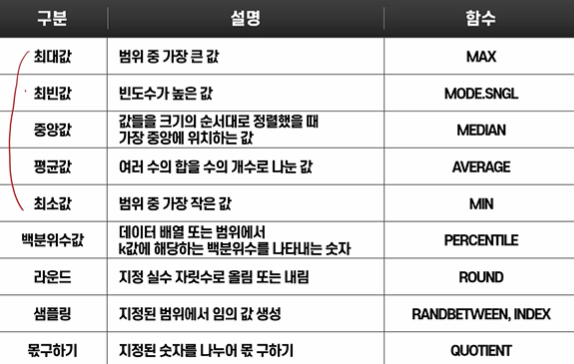

* 상하단 코딩
  
  이상치 기준설정, 검색, 처리 기준 설정, 처리

* 라운딩
  
  라운딩 기본 문법 설명, 고정자릿수 라운딩 실습, 자릿수별 처리 라운딩 실습

* 수치형 데이터 범주화
  
  범주화 기호 이해, 몫 구하기 이해, 기준단위 결정, 기준단위 기준 범주화
  

In [ ]:
class NumericPreprocessing():
  def __init__(self, DATA_LIST: List, MAIN_DATA: pd.DataFrame):
    self.DATA_LIST = DATA_LIST
    self.MAIN_DATA = MAIN_DATA


  # 최댓값, 최빈값, 중간값, 평균값, 최솟값

  # 상하단 코딩
  # 데이터 배열 또는 범위에서 k값에 해당하는 백분위수를 나타내는 숫자 : 백분위수 값(k-익명성)
  def percentileOutlierSearch(self, select_columns, outlierTF_colname,
                 lower_limit, upper_limit):
    # [1] 경계값 설정 1 ~ 10%
    print( self.MAIN_DATA[select_columns].loc[:, self.MAIN_DATA[select_columns] <= lower_limit] )
    print( self.MAIN_DATA[select_columns].loc[:, self.MAIN_DATA[select_columns] >= upper_limit] )

    # [2] 상단 이상치 검색하여 새로운 컬럼 생성
    # [3] 하단 이상치 검색하여 새로운 컬럼 생성
    outlier_index = self.MAIN_DATA[select_columns].loc[
        :, (self.MAIN_DATA[select_columns] <= lower_limit) or (self.MAIN_DATA[select_columns] >= upper_limit)].index.tolist()

    # [4] 상하단 이상치 검색
    self.MAIN_DATA[outlierTF_colname] = 0
    self.MAIN_DATA.iloc[outlier_index, self.MAIN_DATA.columns.get_loc(outlierTF_colname)]
    return self.MAIN_DATA

  # def percentileOutlierDrop()
    # [5] 이상치 대상 삭제 처리



  # 라운드 : 지정 실수 자릿수로 올림 또는 내림
  # 문제는 숫자의 자릿수와 라운딩 자릿수의 유실되는 문제 발생(0)
  # 대안은 랜덤 라운딩


  # 수치형을 범주형으로 변환하는 범주화
  # 몫 : 지정된 숫자를 나누어 몫 구하기
  # 샘플링 : 지정된 범위에서 임의의 값을 생성




In [ ]:
NUMERICPROCESS_INSTANCE = NumericPreprocessing(DATA_LIST = CREDIT_DATA_LIST, MAIN_DATA = JOIN_DATA)

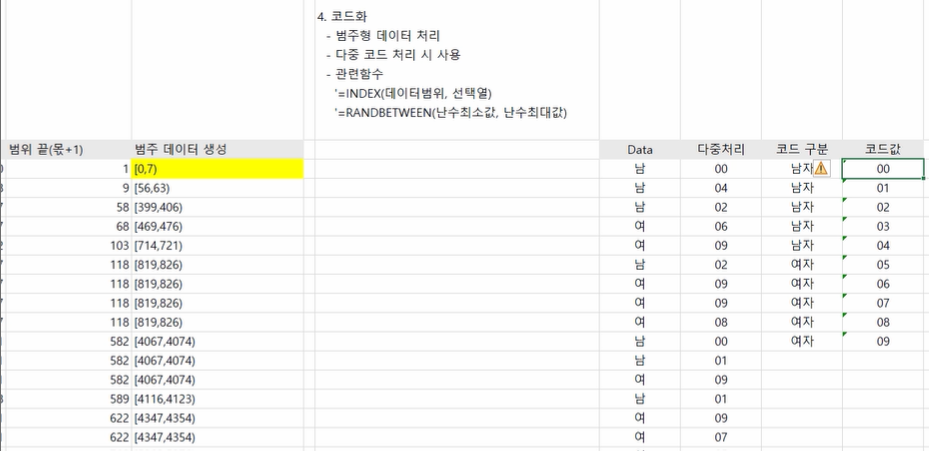

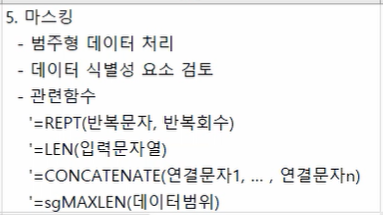


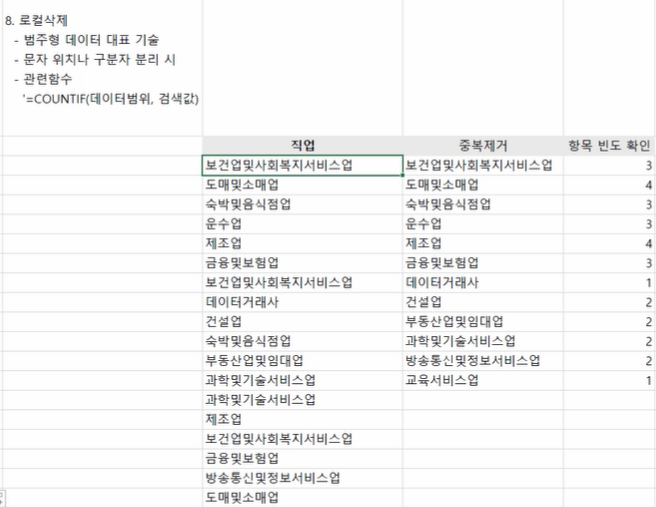

#### 3.2) 문자처리함수

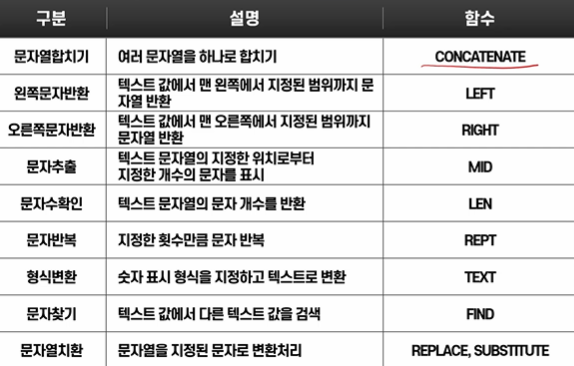

* 문자형 데이터 다중코드화
  
  코드집 정의, 다중코드 생성

* 분리 처리
  
  엑셀 분리 처리 함수 이해, 주소 분리, 날짜 정보 분리

* 로컬 삭제
  
  중복확인, 항목별 빈도확인, 대체처리 기준 설정, 대체 처리

* 마스킹
  
  엑셀 마스킹 처리함수 이해, 마스킹 기술별 식별성 비교

  

  

  

#### 3.3) 사용자정의함수

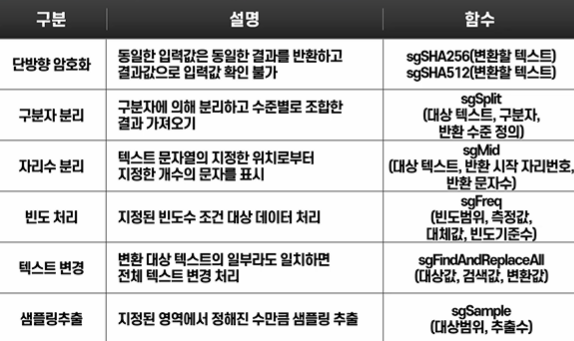